# RAINFALL PREDICTION USING MACHINE LEARNING

# Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
%matplotlib inline

# Load the rainfall dataset

In [2]:
df = pd.read_csv('rainfall.csv')
#shape of the dataset
print(df.shape)

(4116, 19)


4116 rows and 19 columns

In [3]:
#display 5 lines of the dataset
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
#Explore the columns and their datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

# Summary of the dataset

In [6]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
# check the columns

In [7]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

# How many records each sub-division has?

In [8]:
df['SUBDIVISION'].value_counts()

TAMIL NADU                            115
HARYANA DELHI & CHANDIGARH            115
WEST RAJASTHAN                        115
ORISSA                                115
KONKAN & GOA                          115
COASTAL KARNATAKA                     115
ASSAM & MEGHALAYA                     115
KERALA                                115
PUNJAB                                115
SOUTH INTERIOR KARNATAKA              115
WEST MADHYA PRADESH                   115
GUJARAT REGION                        115
GANGETIC WEST BENGAL                  115
CHHATTISGARH                          115
EAST MADHYA PRADESH                   115
MATATHWADA                            115
NAGA MANI MIZO TRIPURA                115
VIDARBHA                              115
MADHYA MAHARASHTRA                    115
BIHAR                                 115
TELANGANA                             115
WEST UTTAR PRADESH                    115
EAST RAJASTHAN                        115
HIMACHAL PRADESH                  

# Select SUBDIVISION 'Madhya Maharashtra'

In [9]:
df_up = df[df.SUBDIVISION == 'MADHYA MAHARASHTRA']
df_up

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2622,MADHYA MAHARASHTRA,1901,18.8,0.6,7.7,36.6,30.4,107.7,215.9,194.1,83.7,68.7,4.4,0.5,769.0,19.4,74.7,601.4,73.5
2623,MADHYA MAHARASHTRA,1902,7.8,0.0,0.1,5.0,9.8,102.6,210.9,114.5,169.5,60.4,40.5,62.9,784.0,7.8,14.9,597.5,163.8
2624,MADHYA MAHARASHTRA,1903,7.6,0.0,0.0,3.2,77.2,86.3,281.8,155.5,142.3,74.2,7.6,2.2,837.9,7.6,80.4,665.9,84.1
2625,MADHYA MAHARASHTRA,1904,0.4,4.7,1.7,3.0,18.7,114.6,126.5,59.5,183.0,91.1,0.0,0.4,603.5,5.1,23.4,483.6,91.4
2626,MADHYA MAHARASHTRA,1905,0.0,1.2,0.0,2.3,23.6,65.0,252.8,79.0,52.6,52.9,8.3,0.0,537.8,1.2,25.9,449.5,61.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,MADHYA MAHARASHTRA,2011,0.0,0.3,0.3,5.0,2.9,133.3,261.4,238.1,148.4,62.8,0.0,0.0,852.6,0.3,8.2,781.3,62.8
2733,MADHYA MAHARASHTRA,2012,0.0,0.0,0.0,3.0,1.4,67.9,203.0,187.8,129.5,95.2,2.2,0.0,689.8,0.0,4.4,588.1,97.3
2734,MADHYA MAHARASHTRA,2013,0.1,5.3,0.8,5.7,6.0,212.4,311.8,147.0,210.3,57.8,4.0,1.3,962.4,5.3,12.4,881.5,63.1
2735,MADHYA MAHARASHTRA,2014,3.1,6.2,24.4,7.5,29.8,44.0,277.9,240.3,120.4,38.5,32.8,13.1,838.0,9.3,61.7,682.6,84.4


# Plot the graph showing the trend of rainfall in Madhya Maharashtra

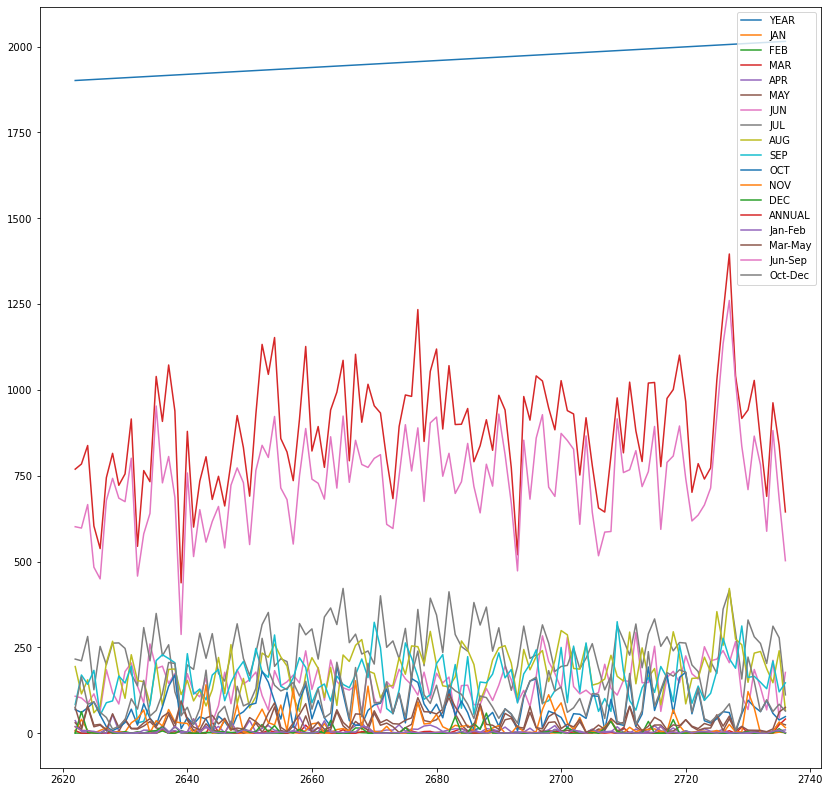

In [10]:
df_up.plot(figsize = (14,14), legend=True)

# Select SUBDIVISION 'Vidarbha'

In [11]:
df_up1 = df[df.SUBDIVISION == 'VIDARBHA']
df_up1

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2852,VIDARBHA,1901,36.8,39.9,30.9,26.1,7.3,129.7,295.3,368.8,123.4,35.2,0.0,0.0,1093.3,76.6,64.3,917.2,35.2
2853,VIDARBHA,1902,1.6,0.1,0.0,6.5,4.1,38.0,270.7,204.7,150.9,29.6,16.1,26.7,748.9,1.7,10.6,664.3,72.4
2854,VIDARBHA,1903,5.2,4.0,0.1,2.5,37.8,121.2,475.5,325.5,154.8,100.8,2.0,0.0,1229.4,9.3,40.3,1077.0,102.8
2855,VIDARBHA,1904,4.3,2.4,12.9,0.2,14.8,148.9,158.3,151.8,196.9,61.7,0.0,0.9,753.2,6.7,27.9,655.9,62.7
2856,VIDARBHA,1905,7.3,12.7,12.4,16.2,14.0,81.0,254.5,216.3,321.3,6.0,0.2,0.0,941.8,20.0,42.6,873.1,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,VIDARBHA,2011,0.0,1.2,0.1,7.7,0.6,137.9,247.1,302.8,191.0,4.7,0.0,0.0,893.2,1.2,8.4,878.8,4.7
2963,VIDARBHA,2012,3.1,0.1,0.0,0.6,0.2,125.5,370.5,316.2,249.4,34.9,7.3,0.0,1107.7,3.2,0.8,1061.5,42.2
2964,VIDARBHA,2013,6.6,13.0,3.8,2.8,0.5,366.7,535.5,326.1,131.7,133.5,0.0,0.0,1520.0,19.6,7.0,1360.0,133.5
2965,VIDARBHA,2014,1.2,18.3,49.6,2.6,4.0,63.3,337.6,191.7,224.9,17.3,6.2,2.3,919.1,19.5,56.3,817.5,25.8


# Plot the graph showing the trend of rainfall in Vidarbha

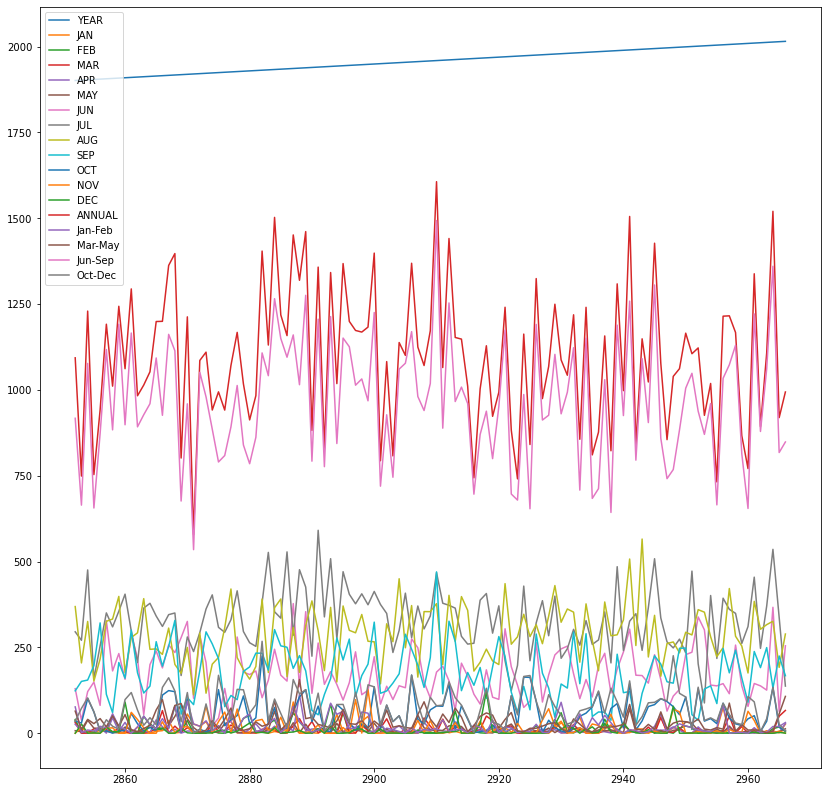

In [12]:
df_up1.plot(figsize = (14,14), legend=True)

# Select SUBDIVISION 'KONKAN & GOA'

In [13]:
df_up2 = df[df.SUBDIVISION == 'KONKAN & GOA']
df_up2

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2507,KONKAN & GOA,1901,5.6,0.1,0.4,35.7,19.9,746.1,1075.5,748.0,117.4,38.6,5.4,0.1,2792.9,5.7,56.0,2687.0,44.1
2508,KONKAN & GOA,1902,0.3,0.0,0.0,0.4,7.6,428.2,943.6,515.1,613.8,74.3,42.7,48.0,2673.9,0.3,8.0,2500.6,165.0
2509,KONKAN & GOA,1903,0.0,0.0,0.1,0.0,201.1,470.5,1298.6,673.9,285.1,140.8,12.4,1.7,3084.3,0.0,201.2,2728.2,154.9
2510,KONKAN & GOA,1904,0.0,0.1,6.6,6.3,4.6,975.8,771.7,321.3,217.0,90.3,0.0,0.0,2393.7,0.1,17.5,2285.8,90.3
2511,KONKAN & GOA,1905,0.1,0.1,0.0,0.4,8.6,293.7,770.6,305.5,208.3,83.5,12.1,0.0,1682.8,0.2,9.0,1578.1,95.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,KONKAN & GOA,2011,0.0,0.0,0.0,3.4,1.1,857.0,1384.1,987.9,468.3,120.3,3.1,0.0,3825.2,0.0,4.5,3697.3,123.5
2618,KONKAN & GOA,2012,0.0,0.0,0.0,0.6,1.1,633.0,928.5,762.5,515.3,175.1,2.3,0.0,3018.4,0.0,1.7,2839.3,177.4
2619,KONKAN & GOA,2013,1.8,5.4,0.1,0.1,18.5,1028.3,1478.5,497.6,340.7,149.3,2.1,1.5,3524.0,7.3,18.7,3345.2,152.8
2620,KONKAN & GOA,2014,1.3,5.3,1.8,0.7,21.3,238.2,1293.2,658.0,419.5,98.7,8.0,11.7,2757.5,6.6,23.8,2608.8,118.4


# Plot the graph showing the trend of rainfall in Konkan & Goa

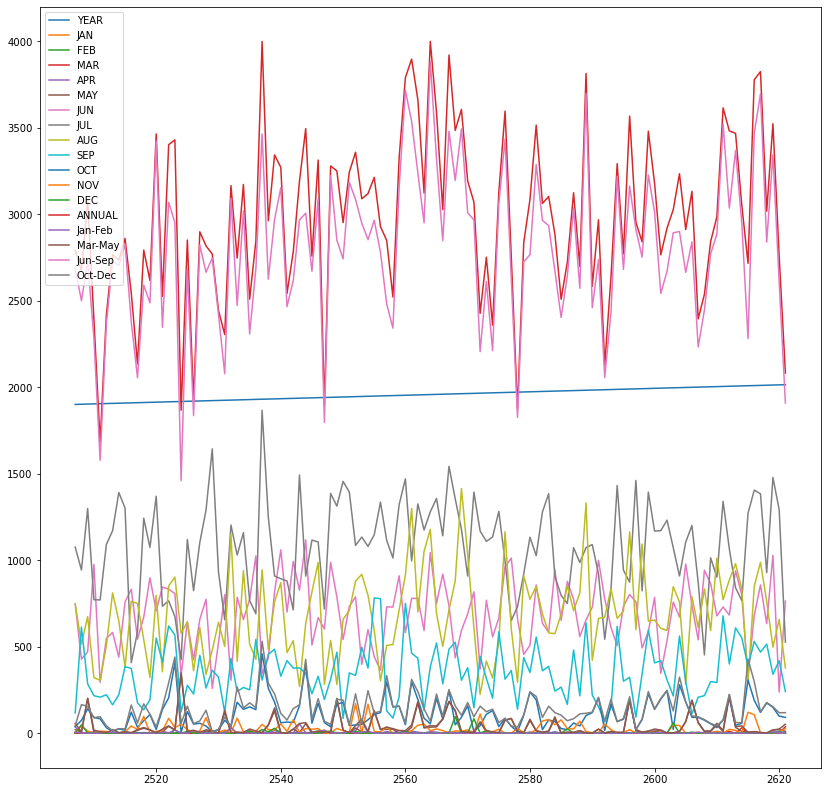

In [14]:
df_up2.plot(figsize = (14,14), legend=True)

# Select SUBDIVISION 'Marathawada'

In [15]:
df_up3 = df[df.SUBDIVISION == 'MATATHWADA']
df_up3

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2737,MATATHWADA,1901,15.8,3.3,32.1,48.5,26.5,193.1,184.1,249.8,74.0,81.6,0.0,0.0,908.7,19.1,107.1,700.9,81.6
2738,MATATHWADA,1902,1.3,0.0,0.4,7.2,0.8,52.4,120.9,85.2,273.3,61.3,84.4,56.9,744.1,1.3,8.4,531.8,202.7
2739,MATATHWADA,1903,2.6,0.8,0.0,1.7,58.3,104.4,264.2,281.9,173.3,139.9,0.3,5.3,1032.6,3.4,60.0,823.8,145.4
2740,MATATHWADA,1904,0.0,0.9,12.1,0.3,7.2,79.2,118.4,57.3,339.0,76.2,0.0,0.0,690.5,0.9,19.5,593.9,76.2
2741,MATATHWADA,1905,1.3,2.0,0.0,6.6,4.8,84.6,94.8,137.6,157.8,15.4,0.9,0.0,505.9,3.3,11.4,474.8,16.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,MATATHWADA,2011,0.0,3.8,0.7,3.5,3.1,79.2,230.1,228.5,90.0,24.8,0.0,0.0,663.5,3.8,7.3,627.7,24.8
2848,MATATHWADA,2012,0.0,0.0,0.0,0.6,2.3,72.2,161.1,101.4,120.0,68.8,0.3,0.0,526.7,0.0,2.9,454.7,69.1
2849,MATATHWADA,2013,1.5,9.4,2.6,7.9,6.4,160.9,293.4,136.9,154.1,94.3,7.4,13.1,888.0,10.9,16.9,745.3,114.8
2850,MATATHWADA,2014,1.4,13.4,79.0,11.9,7.0,30.4,105.0,178.9,84.5,14.2,19.9,3.3,548.9,14.8,97.9,398.8,37.4


# Plot the graph showing the trend of rainfall in Marathawada

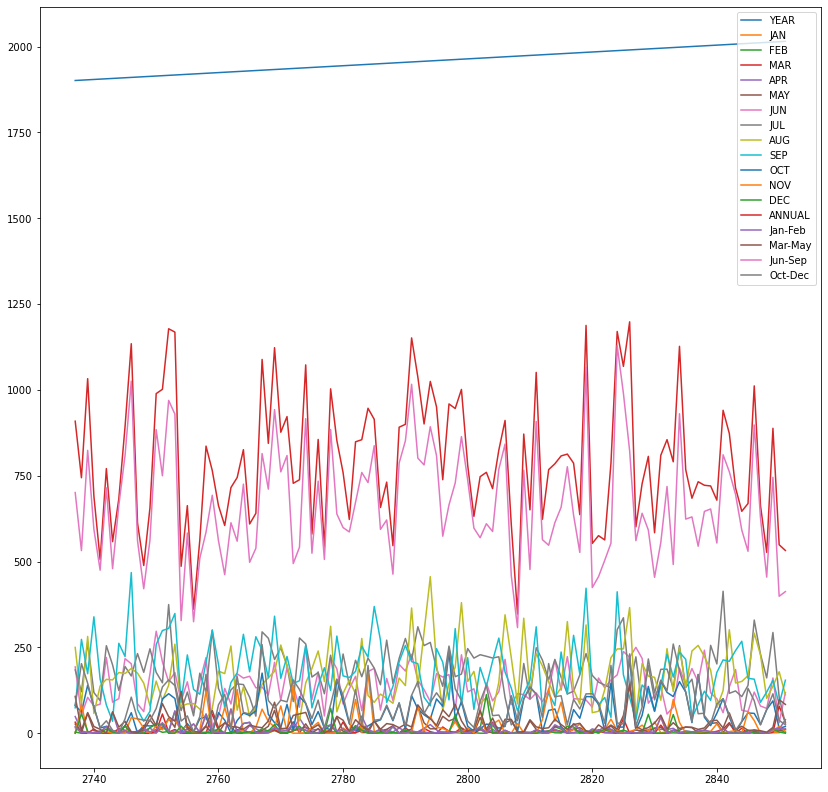

In [16]:
df_up3.plot(figsize = (14,14), legend=True)

# Which are the 10 SUBDIVISION with less rainfall in the 2015?

In [ ]:
df2000 = df.groupby('YEAR').get_group(2015)
less_rainfall10 = df2000[['SUBDIVISION','YEAR','ANNUAL']].sort_values('ANNUAL')
less_rainfall10.head(10)

In [ ]:
less_rainfall10.plot(x= 'SUBDIVISION', y='ANNUAL', figsize=(15,10))